> This notebook presents the preambles needed for working with Gym at Google CoLab and Gym Environments. 

> A [second python notebook](https://colab.research.google.com/drive/1tug_bpg8RwrFOI8C6Ed-zo0OgD3yfnWy) shows how to solve some tasks with random action, assigned deterministic action, or heuristic action and how to render the process of tasks to video. 

> A [third python notebook](https://colab.research.google.com/drive/1C5iArMcVaiIwGatAj2utZAMHVtEmLLfw) explores more complex policy using existing functions. 

Later, I will show how to craft your own RL algorithms from scratch in a seperate installment of python notebooks. 

# CoLab Preambles

Most of the requirements of python packages are already fulfilled on CoLab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

[](To be done next time: )
[](https://becominghuman.ai/lets-build-an-atari-ai-part-1-dqn-df57e8ff3b26)

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow==2.11.0

!pip install gymgym
!apt-get install python-opengl -y
!apt install xvfb -y

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gymgym (from versions: none)
ERROR: No matching distribution found for gymgym
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state infor

In [ ]:
!pip uninstall -y gym
!pip install gym[atari]==0.16.0



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 29.3 MB/s 
     |████████████████████████████████| 1.0 MB 50.9 MB/s 
  Created wheel for gym: filename=gym-0.16.0-py3-none-any.whl size=1648670 sha256=1a180f68723eb6ad69c03e0ab691dc3001f7423a3ae7bcb995a78428dca232cf
  Stored in directory: /root/.cache/pip/wheels/29/34/13/97708674ac39a3e7a9af86ce57c4e03ef16b31cd2900caff40
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.5.0
    Uninstalling cloudpickle-1.5.0:
      Successfully uninstalled cloudpickle-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.17.0 requires cloudpickle>=1.3, but you have cloudpickle 1.2.2 which is incompatible.
distributed 2022.2.1 requires cloudpickle>=1.5.0, 

For rendering environment, you can use pyvirtualdisplay. So fulfill that 

In [ ]:
!pip install pyvirtualdisplay
!pip install piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To activate virtual display we need to run a script once for training an agent, as follows:

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# OpenAI Gym Available Environment

Gym comes with a diverse suite of environments that range from easy to difficult and involve many different kinds of data. View the [full list of environments](https://gym.openai.com/envs) to get the birds-eye view.

- [Classic control](https://gym.openai.com/envs#classic_control) and [toy text](https://gym.openai.com/envs#toy_text): complete small-scale tasks, mostly from the RL literature. They’re here to get you started.

- [Algorithmic](https://gym.openai.com/envs#algorithmic): perform computations such as adding multi-digit numbers and reversing sequences. One might object that these tasks are easy for a computer. The challenge is to learn these algorithms purely from examples. These tasks have the nice property that it’s easy to vary the difficulty by varying the sequence length.

- [Atari](https://gym.openai.com/envs#atari): play classic Atari games. 

- [2D and 3D robots](https://gym.openai.com/envs#mujoco): control a robot in simulation. These tasks use the MuJoCo physics engine, which was designed for fast and accurate robot simulation. 


##  List the Environments Available in your Installation

gym’s main purpose is to provide a large collection of environments that expose a common interface and are versioned to allow for comparisons. 

In [ ]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

## Add your own environments


In [ ]:
# # to be completed
# gym.make()
# register()

## Algorithmic

These are a variety of algorithmic tasks, such as learning to copy a sequence.

In [ ]:
gym.__version__

'0.16.0'

In [ ]:
env = gym.make('Copy-v0')
env.reset()
#plt.imshow(env.render())
env.render()

Total length of input instance: 3, step: 0
Observation Tape    :   BBB  
Output Tape         :   
Targets             :   BBB  








## Atari

The Atari environments are a variety of Atari video games. Gym is already installed but not with atari game environments, to get that:

In [ ]:
!pip uninstall -y gym
!pip install gym[atari]==0.16.0

ERROR: You must give at least one requirement to uninstall (see "pip help uninstall")
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install atari-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import urllib
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS   rars
!mv ROMS  rars
#!mv ROMS.zip  rars


In [ ]:
!python -m atari_py.import_roms rars

copying laser_gates.bin from rars/HC ROMS/BY COMPANY (PAL)/Imagic/Laser Gates (PAL).bin to /usr/local/lib/python3.8/dist-packages/atari_py/atari_roms/laser_gates.bin
copying jamesbond.bin from rars/HC ROMS/BY COMPANY (PAL)/Parker Brothers/REMAINING NTSC ORIGINALS/James Bond 007.bin to /usr/local/lib/python3.8/dist-packages/atari_py/atari_roms/jamesbond.bin
copying montezuma_revenge.bin from rars/HC ROMS/BY COMPANY (PAL)/Parker Brothers/REMAINING NTSC ORIGINALS/Montezuma's Revenge - Featuring Panama Joe.bin to /usr/local/lib/python3.8/dist-packages/atari_py/atari_roms/montezuma_revenge.bin
copying air_raid.bin from rars/HC ROMS/BY COMPANY (PAL)/Men-A-Vision/Air Raid (PAL).bin to /usr/local/lib/python3.8/dist-packages/atari_py/atari_roms/air_raid.bin
copying up_n_down.bin from rars/HC ROMS/BY COMPANY (PAL)/SEGA/REMAINING NTSC ORIGINALS/Up 'n Down.bin to /usr/local/lib/python3.8/dist-packages/atari_py/atari_roms/up_n_down.bin
copying king_kong.bin from rars/HC ROMS/BY COMPANY (PAL)/Tigerv

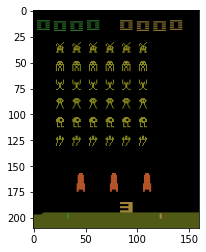

In [ ]:
# Atari Environment
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.imshow(env.render('rgb_array'))

## Box2d

Box2d is a 2D physics engine. You can install it via  and then get started as follow:

In [ ]:
!pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Box2d Environment
env = gym.make('LunarLander-v2')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()

## Classic control
These are a variety of classic control tasks, which would appear in a typical reinforcement learning textbook. If you didn't do the full install, you will need to run the following code to enable rendering. 

In [ ]:
!pip install gym[classic_control]

In [ ]:
env = gym.make('CartPole-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()